# **A Little about Python and Jupyter**


**Additional Reading**
1. [Scientific Python Introduction](http://hplgit.github.io/bumpy/doc/pub/basics.html)

Recommended [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for presenting this notebook:
````
jt -t grade3 -cellw=90% -fs=20 -tfs=20 -ofs=20
````

![](../graphics/spacer_small.png)

** Reusing Code**
- Often, we will want to reuse methods from one notebook to the next.
- We could copy + paste these methods into this notebook, but a better appraoch is to create a python module in a seperate .py file that holds commonly used code. 
- You may have noticed the "util" directory in this repo:

In [1]:
import os

In [2]:
os.listdir("..")

['.git',
 '.gitignore',
 'challenge',
 'data',
 'graphics',
 'notebooks',
 'papers',
 'README.md',
 'requirements.txt',
 'util']

It contains a serveral python modules that contain the various methods we'll develop in the module:

In [3]:
os.listdir("../util")

['filters.py', 'get_and_unpack.py', 'image.py', '__pycache__']

- Let's go have a look at one of these .py files in a text editor. 
- Here's how to import sepcific methods from .py files. 

In [4]:
# First, since our util directory is in our top-level directory, to access 
## these files, we need to add the top-level repo direcotry to our path.
import sys
sys.path.append('..')

In [5]:
#We can now import methods from our util directory
from util.image import convert_to_grayscale

While we're at it, let's look a few nice notebook features. We can see the docstring of the methods we're using right in the notebook by adding a question mark to the end of method or class names:

In [6]:
convert_to_grayscale?

![](../graphics/spacer_small.png)

**Some nice notebook features**

Another nice feature: Press **Shift+Tab** with your cursor inside a methods parenthesis to see it's arguments. 

![](graphics/spacer_small.png)

![](../videos/shift_tab.gif)

![](graphics/spacer_small.png)

And finally, you can access search all commands using the command pallate:
- **(cmnd + shift + p)** on mac
- **(ctrl + shift + p)** or **(ctrl + shift + f)** on linux/windows

And to view all keyboard shortucts press **esc** then **h.**

![](../videos/jupyter_shortcuts.gif)

**One more thing about importing python modules**

- Modules are compiled on import. 
- If we poke around our util directory after import, we see that each python file is compiled into it's own .pyc in a python automatically generated directory called \__pycache__

In [7]:
os.listdir("../util")

['filters.py', 'get_and_unpack.py', 'image.py', '__pycache__']

In [8]:
os.listdir("../util/__pycache__")

['get_and_unpack.cpython-36.pyc', 'image.cpython-36.pyc']

- The important thing to note here is that if you make a change to a .py file, the results of this change will not actually show up **until you reimport the module**, recompiling the .py into .pyc.
- Generally, I'll just run "Restart and Run All" from the Kernel dropdown menu when I make a module change. 
- **Quick Demo:**

In [9]:
#ipython magic numpy and matplotlib import function
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [10]:
#import a test image:
im = imread('../data/medium_2/ball/ball_3.jpg')

In [11]:
gray = convert_to_grayscale(im/255.)

![](graphics/spacer_small.png)

![](../graphics/spacer_small.png)

** A little bit about scientific python**

Python is an incredibly tool for science + engineering. It's one of the easiest languages to learn, but incredibly powerful, especially thanks to packages like numpy, libraries such as opencv, and frameworks like tensorflow. There are lots of great resources on python and scientific python out there - these are terrific. If your new or learning python, I also encourage you to just try things. Python is a friendly enough language that usually after hacking around a bit, plus some help from google and stack overflow, you can figure out what you need.

**Image representation in python**

Images are generally stored in python in 2 or 3 dimensional numpy arrays.

In [12]:
#import a test image:
im = imread('../data/easy/ball/ball_3.jpg')

In [13]:
#Print out raw image values:
im

array([[[250, 250, 250],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[249, 249, 249],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[249, 249, 249],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       ...,

       [[242, 242, 242],
        [243, 243, 243],
        [244, 244, 244],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]],

       [[242, 242, 242],
        [243, 243, 243],
        [244, 244, 244],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]],

       [[243, 243, 243],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [242, 242, 242],
        [242, 242, 242],
        [242, 242, 242]]

In [14]:
#What is the dimension of our image?
im.shape

(256, 256, 3)

Our image is 256 by 256 pixels, and the 3 here corresponds to the red, green, and blue color channels of our image. 

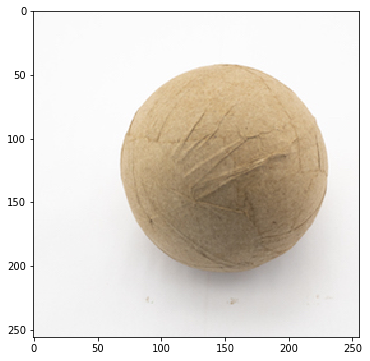

In [15]:
fig = figure(0, (6,6)) #Allows us to control the size of figures
imshow(im)

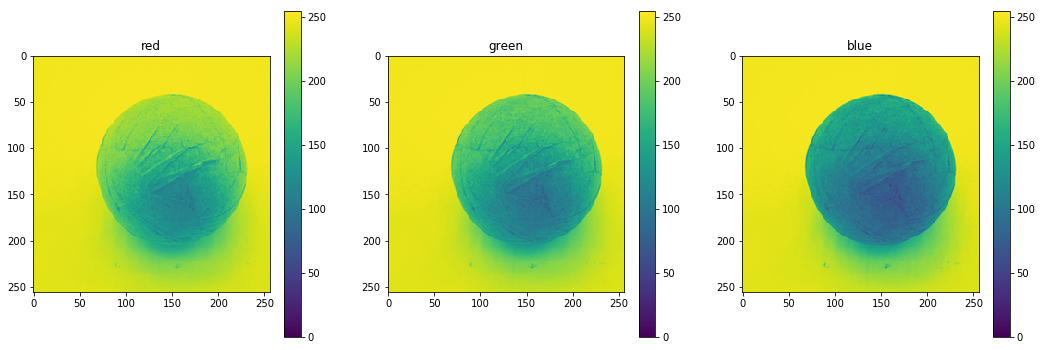

In [16]:
fig = figure(0, (18,6)) #Allows us to control the size of figures
colors = ['red', 'green', 'blue']
for i in range(3):
    fig.add_subplot(1,3,i+1)
    imshow(im[:,:,i], vmin = 0, vmax = 255)
    title(colors[i])
    colorbar()

- Since the ball is darker in our blue than red image, we can infer that the ball is more red than blue. 
- Images are 0-index from the upper left hand corner
- And finally, it's good to keep an eye on our datatypes + the distribution of our data

In [17]:
im.dtype

dtype('uint8')

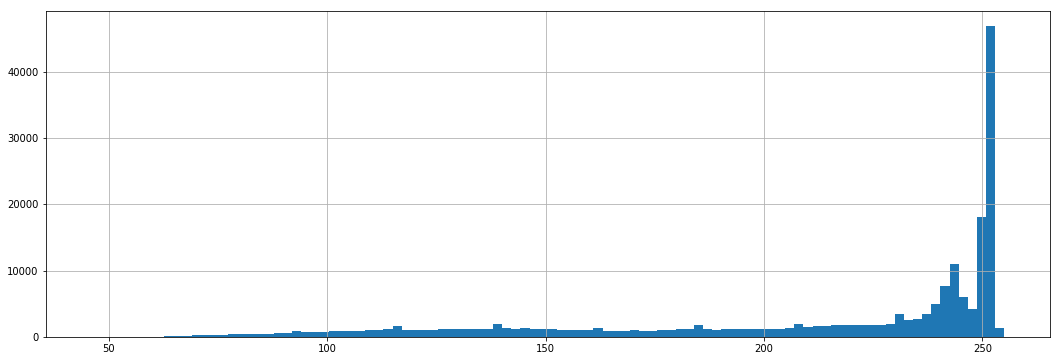

In [18]:
fig = figure(0, (18,6))
hist(im.ravel(), 100);
grid(1)

Our image has a lot of bright white content - which makes sense!